<a href="https://colab.research.google.com/github/pjmartel/teaching/blob/master/enzymology/substrate_inhibition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
from scipy.stats import linregress
from scipy.optimize import curve_fit
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

In [ ]:
# @title
# This is pasted from Excel
data = """
6	5.92
12	9.06
18	9.36
24	9.33
30	8.76
36	8.25
42	8.39
48	7.70
54	7.37
60	7.03
"""

In [ ]:
# @title
# Read the string variable into a numpy array using file strings and nploadtxt
f = StringIO(data)
table_array = np.loadtxt(f)

In [ ]:
# @title
# Rewind the file descriptor and read into pandas dataframe with read_table
f.seek(0)
df = pd.read_table(f, index_col = 0, names=['[S]','vi',])

In [ ]:
# @title
df

,vi
[S],
6,5.92
12,9.06
18,9.36
24,9.33
30,8.76
36,8.25
42,8.39
48,7.70
54,7.37


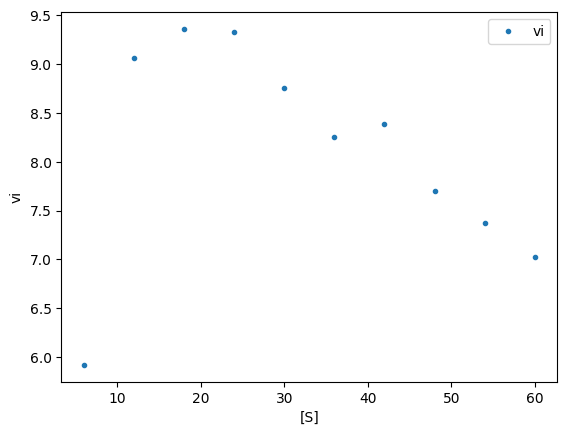

In [ ]:
# @title
_ = df.plot(style='.', ylabel='vi')

In [ ]:
# @title
# x = [A]
def func(x, Vm, Km, Ki):
  return Vm*x/(Km+x+x*x/Ki)

In [ ]:
# @title
(Vm, Km, Ki), _ = curve_fit(func,df.index, df['vi'], p0=[40, 40, 40])

In [ ]:
# @title
(Vm, Km, Ki)

(22.83534389577924, 14.827276681866547, 29.016502807912328)

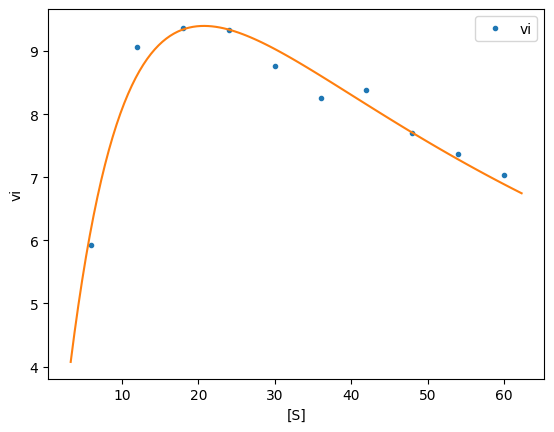

In [ ]:
# @title
ax = df.plot(style='.', ylabel='vi')
x = np.arange(*ax.get_xlim(),0.5)
y = np.array(df['vi'])
_ = ax.plot(x, x*Vm/(Km+x+x*x/Ki),'-')


In [ ]:
# @title
